<a href="https://colab.research.google.com/github/Akshita0501/OIBSIP/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/advertising.zip'

# Directory to extract the files
extracted_path = '/content/advertising_dataset'

# Create the directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [ ]:
import pandas as pd

# Load the dataset
advertising_data_path = os.path.join(extracted_path, 'Advertising.csv')
advertising_df = pd.read_csv(advertising_data_path)

# Display the first few rows of the dataset
print(advertising_df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


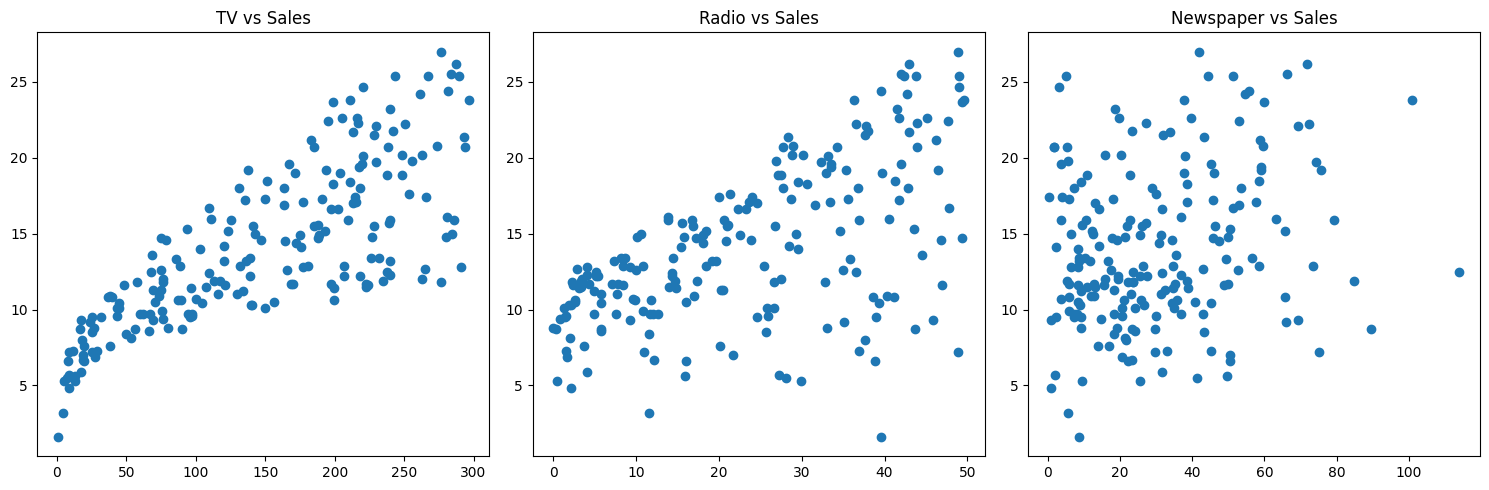

In [ ]:


# Data exploration
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(advertising_df['TV'], advertising_df['Sales'])
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
plt.scatter(advertising_df['Radio'], advertising_df['Sales'])
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
plt.scatter(advertising_df['Newspaper'], advertising_df['Sales'])
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()



In [ ]:

# Data Preprocessing
X = advertising_df[['TV', 'Radio', 'Newspaper']]
y = advertising_df['Sales']


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



Mean Squared Error: 3.1741
R-squared: 0.8994


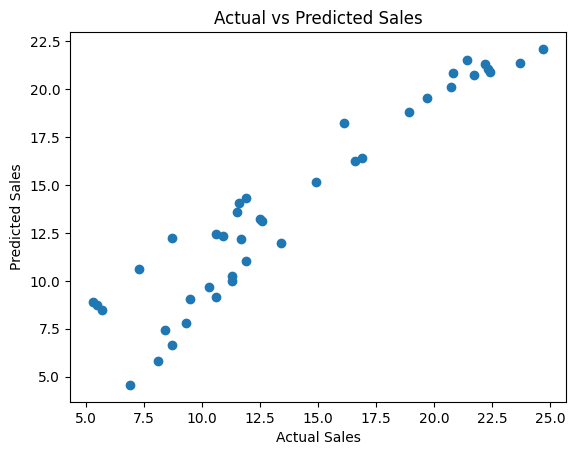

In [ ]:
# Display evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Visualize the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

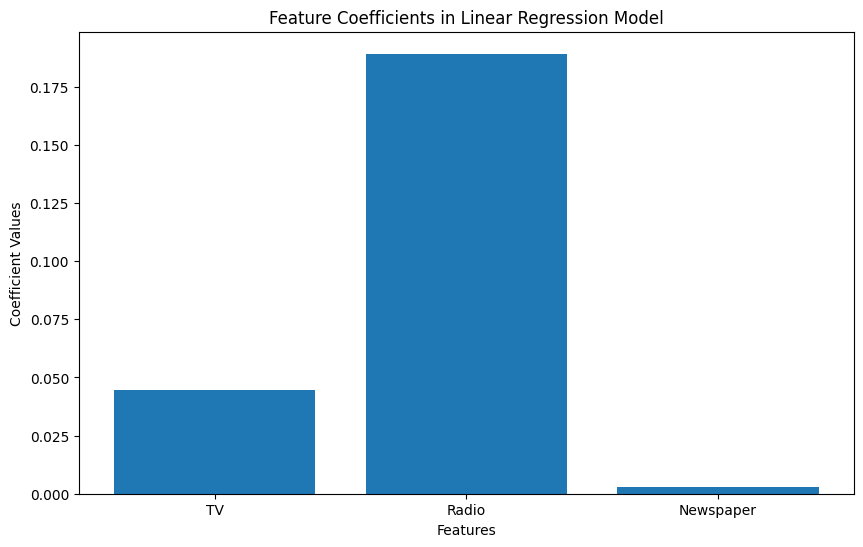

In [ ]:
# Visualize the coefficients of the features
coefficients = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Feature Coefficients in Linear Regression Model')
plt.show()


In [ ]:
# Function to predict sales based on input features
def predict_sales(model, TV, Radio, Newspaper):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({'TV': [TV], 'Radio': [Radio], 'Newspaper': [Newspaper]})

    # Make the prediction
    predicted_sales = model.predict(input_data)[0]

    return predicted_sales

# Example usage:
TV_budget = 150
Radio_budget = 20
Newspaper_budget = 25

predicted_sales = predict_sales(model, TV_budget, Radio_budget, Newspaper_budget)
print(f'Predicted Sales for TV=${TV_budget}, Radio=${Radio_budget}, Newspaper=${Newspaper_budget}: ${predicted_sales:.2f}')


Predicted Sales for TV=$150, Radio=$20, Newspaper=$25: $13.54


In [ ]:
# Function to predict sales based on input features
def predict_sales(model, TV, Radio, Newspaper):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({'TV': [TV], 'Radio': [Radio], 'Newspaper': [Newspaper]})

    # Make the prediction
    predicted_sales = model.predict(input_data)[0]

    return predicted_sales

# Example usage:
TV_budget = 237.4
Radio_budget = 5.1
Newspaper_budget = 23.5

predicted_sales = predict_sales(model, TV_budget, Radio_budget, Newspaper_budget)
print(f'Predicted Sales for TV=${TV_budget}, Radio=${Radio_budget}, Newspaper=${Newspaper_budget}: ${predicted_sales:.2f}')


Predicted Sales for TV=$237.4, Radio=$5.1, Newspaper=$23.5: $14.63
